# 3.2 MOO for 1D scalar fields

In [1]:
import numpy as np

from cyclops.object_reader import PickleManager
from cyclops.plotting import PlotManager

# Load any objects necessary
pickle_manager = PickleManager()
graph_manager = PlotManager()
true_temp_field = pickle_manager.read_file("results/temp_line_field.pickle")
grid = pickle_manager.read_file("results/temp_line_points.pickle")

field_bounds = true_temp_field.get_bounds()
sensor_bounds = field_bounds + np.array([[1], [-1]]) * 0.002

In [3]:
from cyclops.fields import ScalarField
from cyclops.regressors import RBFModel
from cyclops.sensor_suite import SensorSuite
from cyclops.sensors import Thermocouple

# Setup the sensor suite
temps = pickle_manager.read_file("../sensors/k-type-T.pickle")
voltages = pickle_manager.read_file("../sensors/k-type-V.pickle")
sensor = Thermocouple(temps, voltages, 1)
sensors = np.array([sensor] * 5)

sensor_suite = SensorSuite(ScalarField(RBFModel, field_bounds), sensors)

In [4]:
from cyclops.experiment import Experiment
from cyclops.optimisers import NSGA2Optimiser

# Setup the experiment
optimiser = NSGA2Optimiser("00:00:10")
experiment = Experiment(true_temp_field, grid, optimiser)
experiment.plan_moo(
    sensor_suite, sensor_bounds, repetitions=10, loss_limit=1000, num_cores=4
)
res = experiment.design()

pickle_manager.save_file("results/temp_1D_pop.pickle", res.pop)

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       40 |      3 |             - |             -
     2 |       50 |      3 |  0.0501871105 |             f
     3 |       60 |      3 |  0.0207377544 |         ideal
     4 |       70 |      3 |  0.000000E+00 |             f
     5 |       80 |      4 |  0.0285484030 |         ideal
     6 |       90 |      4 |  0.000000E+00 |             f
     7 |      100 |      4 |  0.000000E+00 |             f
     8 |      110 |      4 |  0.0003244056 |             f
     9 |      120 |      4 |  0.0003244056 |             f
    10 |      130 |      4 |  0.0006859764 |             f
    11 |      140 |      5 |  0.0407912817 |             f
    12 |      150 |      4 |  0.6666666667 |         nadir
    13 |      160 |      4 |  0.000000E+00 |             f
    14 |      170 |      4 |  0.0241882849 |             f
    15 |      180 |      4 |  0.0027874900 |             f
    16 |      190 |      4 |  0.000000E+00 |            

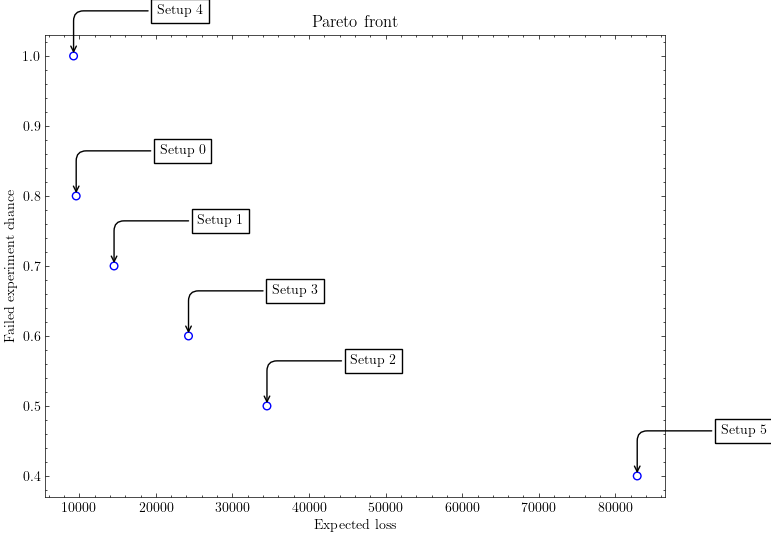

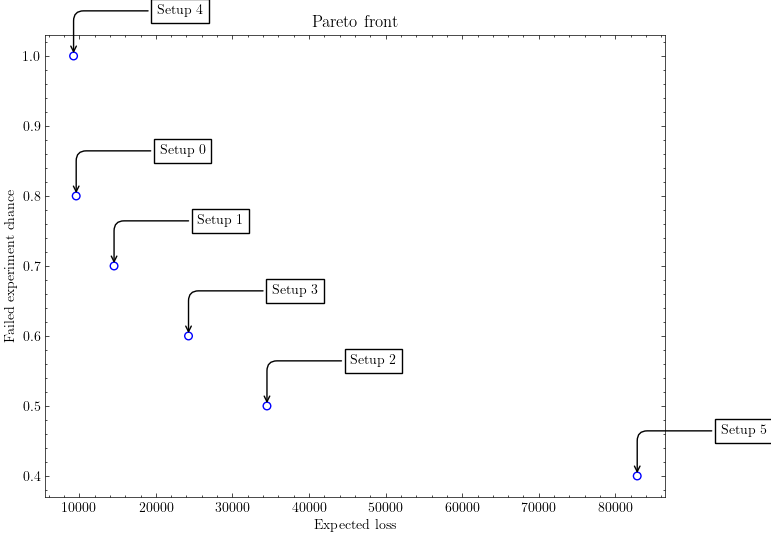

In [5]:
graph_manager.build_pareto(res.F)
graph_manager.draw()

graph_manager.build_pareto(res.F)

display_str = input("Enter setup to display [Q to quit]: ")
while display_str.isnumeric():
    (
        proposed_layout,
        true_temps,
        model_temps,
        sensor_values,
    ) = experiment.get_SOO_plotting_arrays(res.X[int(display_str)])
    print("\nLoss:", experiment.calc_moo_loss(res.X[int(display_str)]))
    graph_manager.build_1D_compare(
        grid, proposed_layout, sensor_values, true_temps, model_temps
    )
    graph_manager.draw()
    display_str = input("Enter setup to display [Q to quit]: ")